In [118]:

'''
Import dependent packages & setup environments
'''
import pandas as pd
import numpy as np


pd.set_option('display.max.colwidth', 50)
pd.set_option('display.width', 1000)

'''
Load Data 
'''
# Materials to use
materials = ["PC", "PA66", "ABS", "PCSMOG", "TPU"]

# Load raw dataset
raw_dataset = pd.read_excel('../../data/iae/injection_mold_5000_v2.xlsx', header=0, index_col=False)
print("Original Raw Data shape : ", raw_dataset.shape)

raw_dataset = raw_dataset.drop(['id', 'datetime', 'mold_name', 'product_quantity'], axis=1).dropna() #remove 3 columns & drop NA
print("> Raw Dataset shape : ", raw_dataset.shape)

# One-hot Encoding for categorical data
raw_onehot = pd.get_dummies(raw_dataset)   # select onehot encoded featureset from raw data
print("> One-Hot encoded data shape : ", raw_onehot.shape)

# select normal dataset
normal_dataset = raw_onehot.loc[raw_onehot["failure_normal"]==1]
print("> Normal data shape : ", normal_dataset.shape)

normal_target = normal_dataset[["weight"]]
normal_source = normal_dataset.drop('weight', axis=1)
print("> Normal Feature shape : ", normal_source.shape)
print("> Normal Target shape : ", normal_target.shape)



Original Raw Data shape :  (4977, 74)
> Raw Dataset shape :  (4930, 70)
> One-Hot encoded data shape :  (4930, 77)
> Normal data shape :  (1188, 77)
> Normal Feature shape :  (1188, 76)
> Normal Target shape :  (1188, 1)


In [ ]:
# ''' 
# Data separation for each materials
# '''
# # for PC
# #pc_dataset = raw_dataset.loc[raw_dataset['material'] == "PC"][["weight", "failure"]].dropna()
# pc_dataset = raw_dataset.where(raw_dataset['material'] == "PC").dropna()
# pc_dataset_positive = pc_dataset.where(pc_dataset["failure"]==0).dropna()
# pc_dataset_negative = pc_dataset.where((pc_dataset["failure"]==1) | (pc_dataset["failure"]==2) | (pc_dataset["failure"]==3)).dropna()

# # for pc66
# #pa66_dataset = raw_dataset.loc[raw_dataset['material'] == "PA66"][["weight", "failure"]].dropna()
# pa66_dataset = raw_dataset.where(raw_dataset['material'] == "PA66").dropna()
# pa66_dataset_positive = pa66_dataset.where(pa66_dataset["failure"]==0).dropna()
# pa66_dataset_negative = pa66_dataset.where((pa66_dataset["failure"]==1) | (pa66_dataset["failure"]==2) | (pa66_dataset["failure"]==3)).dropna()

# # for ABS
# # abs_dataset = raw_dataset.loc[raw_dataset['material'] == "ABS"][["weight", "failure"]].dropna()
# abs_dataset = raw_dataset.where(raw_dataset['material'] == "ABS").dropna()
# abs_dataset_positive = abs_dataset.where(abs_dataset["failure"]==0).dropna()
# abs_dataset_negative = abs_dataset.where((abs_dataset["failure"]==1) | (abs_dataset["failure"]==2) | (abs_dataset["failure"]==3)).dropna()

# # for PCSMOG
# #pcsmog_dataset = raw_dataset.loc[raw_dataset['material'] == "PCSMOG"][["weight", "failure"]].dropna()
# pcsmog_dataset = raw_dataset.where(raw_dataset['material'] == "PCSMOG").dropna()
# pcsmog_dataset_positive = pcsmog_dataset.where(pcsmog_dataset["failure"]==0).dropna()
# pcsmog_dataset_negative = pcsmog_dataset.where((pcsmog_dataset["failure"]==1) | (pcsmog_dataset["failure"]==2) | (pcsmog_dataset["failure"]==3)).dropna()

# # for TPU
# #tpu_dataset = raw_dataset.loc[raw_dataset['material'] == "TPU"][["weight", "failure"]].dropna()
# tpu_dataset = raw_dataset.where(raw_dataset['material'] == "TPU").dropna()
# tpu_dataset_positive = tpu_dataset.where(tpu_dataset["failure"]==0).dropna()
# tpu_dataset_negative = tpu_dataset.where((tpu_dataset["failure"]==1) | (tpu_dataset["failure"]==2) | (tpu_dataset["failure"]==3)).dropna()

(795, 76)
(393, 76)
(795,)
(393,)
Epoch 1/100
50/50 - 1s - loss: 0.1562 - val_loss: 0.0856 - 596ms/epoch - 12ms/step
Epoch 2/100
50/50 - 0s - loss: 0.0262 - val_loss: 0.0525 - 89ms/epoch - 2ms/step
Epoch 3/100
50/50 - 0s - loss: 0.0208 - val_loss: 0.0358 - 84ms/epoch - 2ms/step
Epoch 4/100
50/50 - 0s - loss: 0.0186 - val_loss: 0.0235 - 88ms/epoch - 2ms/step
Epoch 5/100
50/50 - 0s - loss: 0.0138 - val_loss: 0.0143 - 86ms/epoch - 2ms/step
Epoch 6/100
50/50 - 0s - loss: 0.0156 - val_loss: 0.0105 - 101ms/epoch - 2ms/step
Epoch 7/100
50/50 - 0s - loss: 0.0144 - val_loss: 0.0068 - 93ms/epoch - 2ms/step
Epoch 8/100
50/50 - 0s - loss: 0.0121 - val_loss: 0.0072 - 86ms/epoch - 2ms/step
Epoch 9/100
50/50 - 0s - loss: 0.0121 - val_loss: 0.0063 - 90ms/epoch - 2ms/step
Epoch 10/100
50/50 - 0s - loss: 0.0105 - val_loss: 0.0064 - 87ms/epoch - 2ms/step
Epoch 11/100
50/50 - 0s - loss: 0.0102 - val_loss: 0.0045 - 87ms/epoch - 2ms/step
Epoch 12/100
50/50 - 0s - loss: 0.0090 - val_loss: 0.0042 - 81ms/epoch

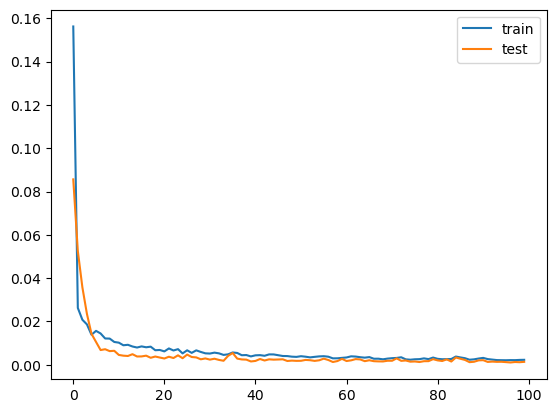

In [119]:
''' 
Auto Encoder for regression
'''
# train autoencoder for regression with no compression in the bottleneck layer
from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot

n_inputs = normal_source.shape[1]

X_train, X_test, y_train, y_test = train_test_split(normal_source, np.ravel(normal_target), test_size=0.33, shuffle=True)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# Data Scaler
source_scaler = MinMaxScaler()
source_scaler.fit(normal_source)

X_train_scaled = source_scaler.transform(X_train)
X_test_scaled = source_scaler.transform(X_test)


# define encoder
visible = Input(shape=(n_inputs,))
e = Dense(n_inputs*2)(visible)
e = BatchNormalization()(e)
e = ReLU()(e)

# define bottleneck
n_bottleneck = n_inputs
bottleneck = Dense(n_bottleneck)(e)

# define decoder
d = Dense(n_inputs*2)(bottleneck)
d = BatchNormalization()(d)
d = ReLU()(d)

# output layer
output = Dense(n_inputs, activation='linear')(d)

# define autoencoder model
model = Model(inputs=visible, outputs=output)

# compile autoencoder model
model.compile(optimizer='adam', loss='mse')

# plot the autoencoder
plot_model(model, 'autoencoder.png', show_shapes=True)

# fit the autoencoder model to reconstruct input
history = model.fit(X_train_scaled, X_train_scaled, epochs=100, batch_size=16, verbose=2, validation_data=(X_test_scaled, X_test_scaled))

# plot loss
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

# define an encoder model (without the decoder)
encoder = Model(inputs=visible, outputs=bottleneck)
plot_model(encoder, 'encoder.png', show_shapes=True)

# save the encoder to file
encoder.save('encoder.h5')


13/13 [==============================] - 0s 709us/step


/Users/byunghunhwang/opt/anaconda3/envs/mold/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/byunghunhwang/opt/anaconda3/envs/mold/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/byunghunhwang/opt/anaconda3/envs/mold/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


96.46320756228897
0.008308591631541351
0.9647833024384197


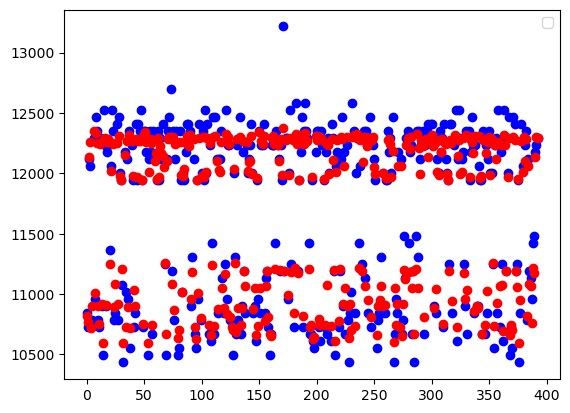

In [120]:
# support vector regression performance with encoded input 
from sklearn.datasets import make_regression 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVR 
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from tensorflow.keras.models import load_model 

# define dataset 
#X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1) 

# split into train test sets 
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1) 

# reshape target variables so that we can transform them 
y_train = y_train.reshape((len(y_train), 1)) 
y_test = y_test.reshape((len(y_test), 1))

# scale input data 
# trans_in = MinMaxScaler() 
# trans_in.fit(X_train) 
# X_train = trans_in.transform(X_train) 
# X_test = trans_in.transform(X_test) 

# target data scaler
target_scaler = MinMaxScaler()
target_scaler.fit(normal_target)
y_train_scaled = target_scaler.transform(y_train)
y_test_scaled = target_scaler.transform(y_test)

# scale output data 
# trans_out = MinMaxScaler() 
# trans_out.fit(y_train) 
# y_train = trans_out.transform(y_train) 
# y_test = trans_out.transform(y_test) 

# load the model from file 
encoder = load_model('encoder.h5') 

# encode the train data 
X_train_encode = encoder.predict(X_train_scaled) 

# encode the test data 
X_test_encode = encoder.predict(X_test_scaled) 

# define model 
model = SVR() 

# fit model on the training dataset 
model.fit(X_train_encode, y_train) 

# make prediction on test set 
yhat = model.predict(X_test_encode) 

# invert transforms so we can calculate errors 
yhat = yhat.reshape((len(yhat), 1)) 
yhat = target_scaler.inverse_transform(yhat) 
y_test = target_scaler.inverse_transform(y_test) 

# calculate error 
score = mean_absolute_error(y_test, yhat)
print(score) 

# percentage error
pscore = mean_absolute_percentage_error(y_test, yhat)
print(pscore)

# r squared
r2 = r2_score(y_test, yhat, multioutput='variance_weighted')
print(r2)


pyplot.plot(y_test, 'bo')
pyplot.plot(yhat, 'ro')
pyplot.legend()
pyplot.show()

In [117]:
''' 
Data Reconstruction test
'''
print(X_test)

[[0.7816245  0.19444444 0.87254902 ... 0.         0.         1.        ]
 [0.74700399 0.72222222 0.59803922 ... 0.         0.         1.        ]
 [0.65379494 0.52777778 0.87254902 ... 0.         0.         0.        ]
 ...
 [0.65778961 0.38888889 0.79411765 ... 0.         0.         0.        ]
 [0.57390146 0.41666667 0.29411765 ... 0.         0.         0.        ]
 [0.58055925 0.47222222 0.32352941 ... 1.         0.         0.        ]]
